<a href="https://colab.research.google.com/github/faisal-rasheed-lone/Neural-Networks-And-Deep-Learning/blob/master/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [2]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-11 11:23:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.207, 74.125.203.207, 74.125.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.1MB/s    in 56s     

2023-10-11 11:24:45 (8.88 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# Define the paths to the train and test data directories
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

# Define image dimensions and batch size
image_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [4]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# VGG 16 architecture , commenting some of the layers because the data is less ,
#  and also it suffers from vanishing Gradient pbl
from tensorflow.keras.models import Sequential
vgg16_model = Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    # tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    # tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    # tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(4096, activation='relu'),
    # tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
vgg16_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])


In [6]:
# Adding Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    save_best_only=True,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [7]:
# Set the number of epochs
epochs = 50

# Train the model
history = vgg16_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator),
    callbacks = [early_stopping,checkpoint]
)


Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 2.1741 - accuracy: 0.2001
Epoch 1: val_loss improved from inf to 1.98820, saving model to best_model.h5
235/235 [==============================] - 148s 552ms/step - loss: 2.1741 - accuracy: 0.2001 - val_loss: 1.9882 - val_accuracy: 0.2852
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 1.9970 - accuracy: 0.2967
Epoch 2: val_loss improved from 1.98820 to 1.80667, saving model to best_model.h5
235/235 [==============================] - 130s 553ms/step - loss: 1.9970 - accuracy: 0.2967 - val_loss: 1.8067 - val_accuracy: 0.3664
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 1.9095 - accuracy: 0.3320
Epoch 3: val_loss did not improve from 1.80667
235/235 [==============================] - 126s 536ms/step - loss: 1.9095 - accuracy: 0.3320 - val_loss: 1.9494 - val_accuracy: 0.3360
Epoch 4/50
235/235 [==============================] - ETA: 0s - loss: 1.8560 - accuracy: 0.3604
Epoc

In [8]:
# Evaluate the model on the test data
test_loss, test_accuracy = vgg16_model.evaluate(test_generator, steps=len(test_generator))
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')


79/79 [==============================] - 8s 102ms/step - loss: 1.0535 - accuracy: 0.6644
Test loss: 1.0535
Test accuracy: 0.6644


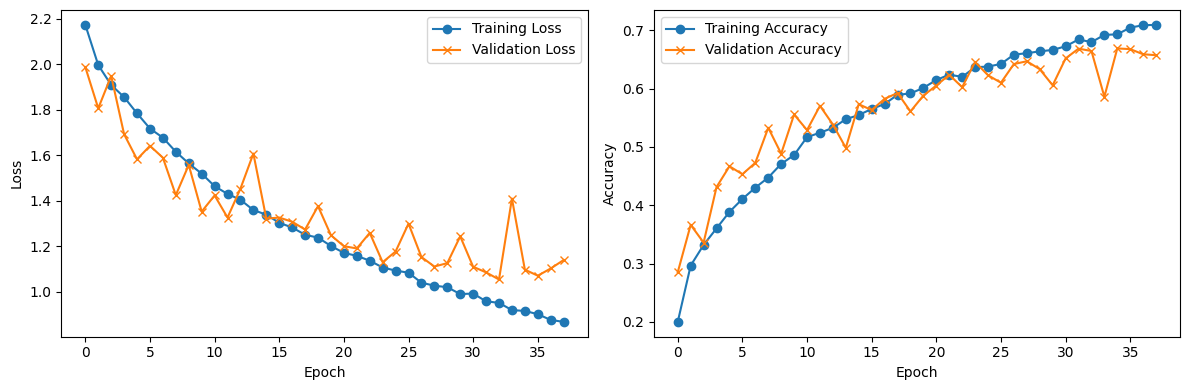

In [9]:
import matplotlib.pyplot as plt


# Plot training and validation loss with markers
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy with markers
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [11]:
class_names = ['chicken_curry','chicken_wings','fried_rice','grilled_salmon','hamburger','ice_cream','pizza','ramen','steak','sushi']


In [12]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [13]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


In [14]:
!wget https://hips.hearstapps.com/hmg-prod/images/delish-fried-rice-020-1543875572.jpg?crop=1xw:0.84375xh;center,top&resize=1200:*

--2023-10-11 12:50:42--  https://hips.hearstapps.com/hmg-prod/images/delish-fried-rice-020-1543875572.jpg?crop=1xw:0.84375xh
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1722236 (1.6M) [image/jpeg]
Saving to: ‘delish-fried-rice-020-1543875572.jpg?crop=1xw:0.84375xh’

delish-fried-rice-0 100%[===================>]   1.64M  --.-KB/s    in 0.08s   

2023-10-11 12:50:43 (20.6 MB/s) - ‘delish-fried-rice-020-1543875572.jpg?crop=1xw:0.84375xh’ saved [1722236/1722236]

/bin/bash: line 1: center,top: command not found


1/1 [==============================] - 1s 522ms/step


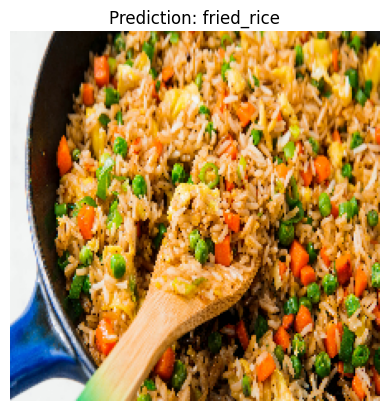

In [17]:
pred_and_plot(vgg16_model, "r1.jpg", class_names)
